In [2]:
import numpy as np
import pandas as pd
from plot import mv_plot as plot
from numba import njit
from time import time

In [3]:
@njit
def train_step(lr, n_iters, x1_train, x2_train, x3_train, y_train):
    n = x1_train.size
    w1, w2, w3, b = 0.0, 0.0, 0.0, 0.0
    history = np.zeros(n_iters // 1000 + 1)
    idx = 0

    for i in range(n_iters):
        y_pred = w1 * x1_train + w2 * x2_train + w3 * x3_train + b  
        error = y_pred - y_train
        
        dw1 = np.dot(error, x1_train)
        dw2 = np.dot(error, x2_train)
        dw3 = np.dot(error, x3_train)
        db  = np.sum(error)

        w1 -= lr * dw1 / n
        w2 -= lr * dw2 / n
        w3 -= lr * dw3 / n
        b  -= lr * db  / n

        # Logging
        if i % 1000 == 0 or i == n_iters - 1:
            cost = sec(x1_train, x2_train, x3_train, y_train, w1, w2, w3, b)
            history[idx] = cost
            idx += 1
            
    return w1, w2, w3, b, history

In [4]:
def train(lr, n_iters, x1_train, x2_train, x3_train, y_train):
    w1, w2, w3, b, history = train_step(lr, n_iters, x1_train, x2_train, x3_train, y_train)

    for i, cost in enumerate(history):
        print(f"Iteration: {i * 1000}, Cost: {cost:.4f}")

    return w1, w2, w3, b

In [5]:
# Squared Error Cost Function
@njit
def sec(x1_test, x2_test, x3_test, y_test, w1, w2, w3, b):
    y_pred = w1 * x1_test + w2 * x2_test + w3 * x3_test + b
    error = y_pred - y_test
    cost = (1 / (2 * x1_test.size)) * np.sum(error ** 2)
    return cost

In [8]:
def predict(lr, n_iters, x1_train, x2_train, x3_train, y_train, x1_test, x2_test, x3_test, y_test):
    st = time()
    w1, w2, w3, b = train(lr, n_iters, x1_train, x2_train, x3_train, y_train)
    train_cost = sec(x1_train, x2_train, x3_train, y_train, w1, w2, w3, b)
    test_cost = sec(x1_test, x2_test, x3_test, y_test, w1, w2, w3, b)
    ed = time()
    print("Train Cost = ", train_cost)
    print("Test Cost = ", test_cost)
    print(f"time: {(ed - st):.4f}")
    plot(w1, w2, w3, b, test_cost)

Iteration: 0, Cost: 730.6358
Iteration: 1000, Cost: 36.7408
Iteration: 2000, Cost: 33.7980
Iteration: 3000, Cost: 32.9343
Iteration: 4000, Cost: 32.6430
Iteration: 5000, Cost: 32.5435
Iteration: 6000, Cost: 32.5095
Iteration: 7000, Cost: 32.4979
Iteration: 8000, Cost: 32.4939
Iteration: 9000, Cost: 32.4926
Iteration: 10000, Cost: 32.4921
Train Cost =  32.492115982247306
Test Cost =  42.49377641056973
time: 0.0237


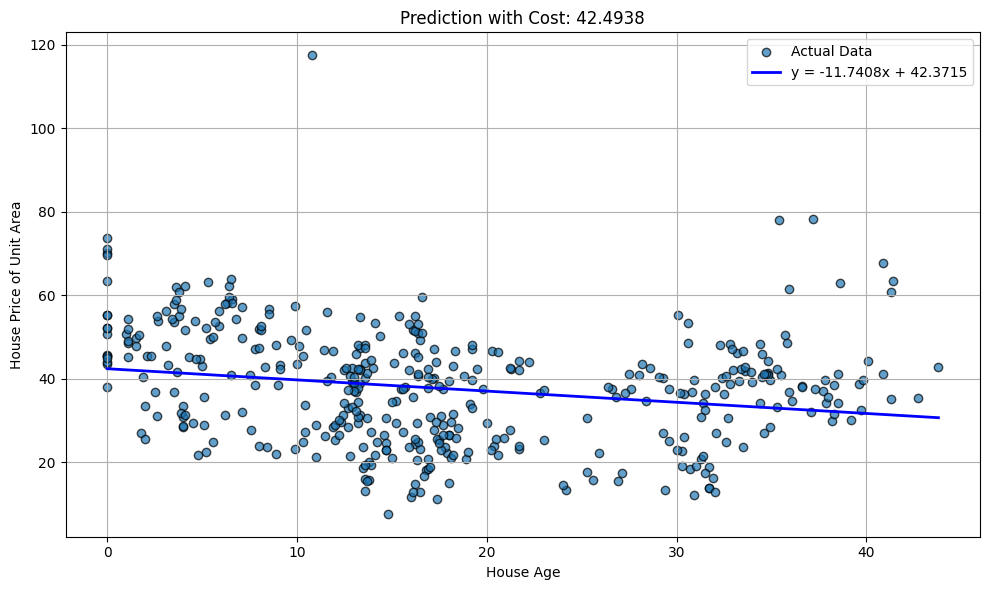

In [9]:
if __name__ == "__main__":
    # Data Processing
    train_data = pd.read_csv("RealEstate.csv")
    test_data = pd.read_csv("RealEstate_old.csv")

    x1_train = train_data['X2.house.age'].to_numpy()
    x2_train = train_data['X3.distance.to.the.nearest.MRT.station'].to_numpy()
    x3_train = train_data['X4.number.of.convenience.stores'].to_numpy()
    y_train = train_data['Y.house.price.of.unit.area'].to_numpy()

    x1_test = test_data['X2 house age'].to_numpy()
    x2_test = test_data['X3 distance to the nearest MRT station'].to_numpy()
    x3_test = test_data['X4 number of convenience stores'].to_numpy()
    y_test = test_data['Y house price of unit area'].to_numpy()

    # Normalization
    x1_min, x1_max = x1_train.min(), x1_train.max()
    x2_min, x2_max = x2_train.min(), x2_train.max()
    x3_min, x3_max = x3_train.min(), x3_train.max()

    x1_train = (x1_train - x1_min) / (x1_max - x1_min)
    x2_train = (x2_train - x2_min) / (x2_max - x2_min)
    x3_train = (x3_train - x3_min) / (x3_max - x3_min)

    x1_test = (x1_test - x1_min) / (x1_max - x1_min)
    x2_test = (x2_test - x2_min) / (x2_max - x2_min)
    x3_test = (x3_test - x3_min) / (x3_max - x3_min)

    lr = 0.03
    n_iters = 10_000
    
    predict(lr, n_iters, x1_train, x2_train, x3_train, y_train, x1_test, x2_test, x3_test, y_test)